### Uses the MGRS_corners code to plot activated cells from the Northridge simulation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import pandas as pd
import cartopy.feature as cfeature
from matplotlib.transforms import offset_copy
import cartopy.io.img_tiles as cimgt
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.ticker as mticker
from MGRS_corners import MGRStopoly
#import geopandas as gpd

In [2]:
import glob

The two cells below are needed for plotting the phase time radii 

In [20]:
def shoot(lon, lat, azimuth, maxdist=None):
    """Shooter Function
    Original javascript on http://williams.best.vwh.net/gccalc.htm
    Translated to python by Thomas Lecocq
    """
    glat1 = lat * np.pi / 180.
    glon1 = lon * np.pi / 180.
    s = maxdist / 1.852
    faz = azimuth * np.pi / 180.

    EPS= 0.00000000005
    #if ((np.abs(np.cos(glat1))<EPS) and not (np.abs(np.sin(faz))<EPS)):
    #    alert("Only N-S courses are meaningful, starting at a pole!")

    a=6378.13/1.852
    f=1/298.257223563
    r = 1 - f
    tu = r * np.tan(glat1)
    sf = np.sin(faz)
    cf = np.cos(faz)
    if (cf==0):
        b=0.
    else:
        b=2. * np.arctan2 (tu, cf)

    cu = 1. / np.sqrt(1 + tu * tu)
    su = tu * cu
    sa = cu * sf
    c2a = 1 - sa * sa
    x = 1. + np.sqrt(1. + c2a * (1. / (r * r) - 1.))
    x = (x - 2.) / x
    c = 1. - x
    c = (x * x / 4. + 1.) / c
    d = (0.375 * x * x - 1.) * x
    tu = s / (r * a * c)
    y = tu
    c = y + 1
    while (np.abs (y - c) > EPS):

        sy = np.sin(y)
        cy = np.cos(y)
        cz = np.cos(b + y)
        e = 2. * cz * cz - 1.
        c = y
        x = e * cy
        y = e + e - 1.
        y = (((sy * sy * 4. - 3.) * y * cz * d / 6. + x) *
              d / 4. - cz) * sy * d + tu

    b = cu * cy * cf - su * sy
    c = r * np.sqrt(sa * sa + b * b)
    d = su * cy + cu * sy * cf
    glat2 = (np.arctan2(d, c) + np.pi) % (2*np.pi) - np.pi
    c = cu * cy - su * sy * cf
    x = np.arctan2(sy * sf, c)
    c = ((-3. * c2a + 4.) * f + 4.) * c2a * f / 16.
    d = ((e * cy * c + cz) * sy * c + y) * sa
    glon2 = ((glon1 + x - (1. - c) * d * f + np.pi) % (2*np.pi)) - np.pi

    baz = (np.arctan2(sa, b) + np.pi) % (2 * np.pi)

    glon2 *= 180./np.pi
    glat2 *= 180./np.pi
    baz *= 180./np.pi

    return (glon2, glat2, baz)

In [21]:
def equi(centerlon, centerlat, radius):
    '''
    Generate points for circle plot
    '''
    glon1 = centerlon
    glat1 = centerlat
    X = []
    Y = []
    
    for azimuth in range(0, 360):
        glon2, glat2, baz = shoot(glon1, glat1, azimuth, radius)
        X.append(glon2)
        Y.append(glat2)
        
    X.append(X[0])
    Y.append(Y[0])
    
    return X,Y

In [22]:
trigger_files = list(sorted(glob.glob('active_triggers/active_triggers*')))

In [23]:
trigger_files

['active_triggers/active_triggers_000.csv',
 'active_triggers/active_triggers_001.csv',
 'active_triggers/active_triggers_002.csv',
 'active_triggers/active_triggers_003.csv',
 'active_triggers/active_triggers_004.csv',
 'active_triggers/active_triggers_005.csv',
 'active_triggers/active_triggers_006.csv',
 'active_triggers/active_triggers_007.csv',
 'active_triggers/active_triggers_008.csv',
 'active_triggers/active_triggers_009.csv',
 'active_triggers/active_triggers_010.csv',
 'active_triggers/active_triggers_011.csv',
 'active_triggers/active_triggers_012.csv',
 'active_triggers/active_triggers_013.csv',
 'active_triggers/active_triggers_014.csv',
 'active_triggers/active_triggers_015.csv',
 'active_triggers/active_triggers_016.csv',
 'active_triggers/active_triggers_017.csv',
 'active_triggers/active_triggers_018.csv',
 'active_triggers/active_triggers_019.csv']

In [24]:
triggers = pd.read_csv(trigger_files[10])

In [25]:
mgrs_cells = open('mgrs_all_cells.csv','r')
cell_lines = mgrs_cells.readlines()
mgrs_cells.close()

In [26]:
len(cell_lines)

24

In [27]:
cell_lines

['11SLT85 11SLT94 11SLT68 \n',
 'None\n',
 '11SLT85 11SLT94 11SLT68 \n',
 'None\n',
 '11SLT85 11SLT66 11SLT94 11SLT68 \n',
 'None\n',
 '11SLT85 11SLT66 11SLT94 11SLT68 \n',
 'None\n',
 '11SLT85 11SLT68 11SLT66 11SLT94 \n',
 'None\n',
 '11SLT85 11SLT68 11SLT66 11SLT94 \n',
 'None\n',
 '11SLT85 11SLT68 11SLT66 11SLT94 \n',
 'None\n',
 '11SLT85 11SLT68 11SLT66 11SLT94 \n',
 'None\n',
 '11SLT69 11SLT68 11SLT59 11SLT48 11SLT58 11SLU50 11SLT78 11SLT85 11SLT66 11SLT94 \n',
 'None\n',
 '11SLT69 11SLT68 11SLT59 11SLT48 11SLT58 11SLU50 11SLT78 11SLT85 11SLT66 11SLT94 \n',
 'None\n',
 '11SLT69 11SLT78 11SLT68 11SLT59 11SLT48 11SLT77 11SLT58 11SLT49 11SLT79 11SLT57 11SLT39 11SLT66 11SLU50 11SLT85 11SLT94 \n',
 '11SLT69 11SLT68 11SLT59 11SLT58 \n',
 '11SLT69 11SLT68 11SLT59 11SLT58 \n',
 '-----------------------------\n']

In [28]:
detection_step = cell_lines[-4:-2]

In [29]:
first_detection_cells = [cell.encode() for cell in cell_lines[16].split()]
detection_cells = [cell.encode() for cell in detection_step[1].split()]
all_cells_at_detection = [cell.encode() for cell in detection_step[0].split()]

In [30]:
all_cells_at_detection

[b'11SLT69',
 b'11SLT78',
 b'11SLT68',
 b'11SLT59',
 b'11SLT48',
 b'11SLT77',
 b'11SLT58',
 b'11SLT49',
 b'11SLT79',
 b'11SLT57',
 b'11SLT39',
 b'11SLT66',
 b'11SLU50',
 b'11SLT85',
 b'11SLT94']

In [37]:
#Convert these MGRS grid cells to polygons

convert0 = MGRStopoly(first_detection_cells)
convert = MGRStopoly(detection_cells)
convert2 = MGRStopoly(all_cells_at_detection)

In [32]:
initial_polygons = convert0.generate_polytable()

Need to check the ID of northern adjacent 100,000 m^2 cell
Need to check the ID of northern adjacent 100,000 m^2 cell
Need to check the ID of eastern adjacent 100,000 m^2 cell


In [33]:
polygons_at_detection = convert.generate_polytable()

Need to check the ID of northern adjacent 100,000 m^2 cell
Need to check the ID of northern adjacent 100,000 m^2 cell


In [34]:
all_polygons_at_detection = convert2.generate_polytable()

Need to check the ID of northern adjacent 100,000 m^2 cell
Need to check the ID of northern adjacent 100,000 m^2 cell
Need to check the ID of northern adjacent 100,000 m^2 cell
Need to check the ID of northern adjacent 100,000 m^2 cell
Need to check the ID of northern adjacent 100,000 m^2 cell
Need to check the ID of eastern adjacent 100,000 m^2 cell


In [35]:
polygons_at_detection.head()

,geometry
0,POLYGON ((-118.5202608082636 34.24169124029213...
1,POLYGON ((-118.5186432698128 34.15153674000519...
2,POLYGON ((-118.6288135460543 34.24029689176459...
3,POLYGON ((-118.6270806289853 34.15014707577839...


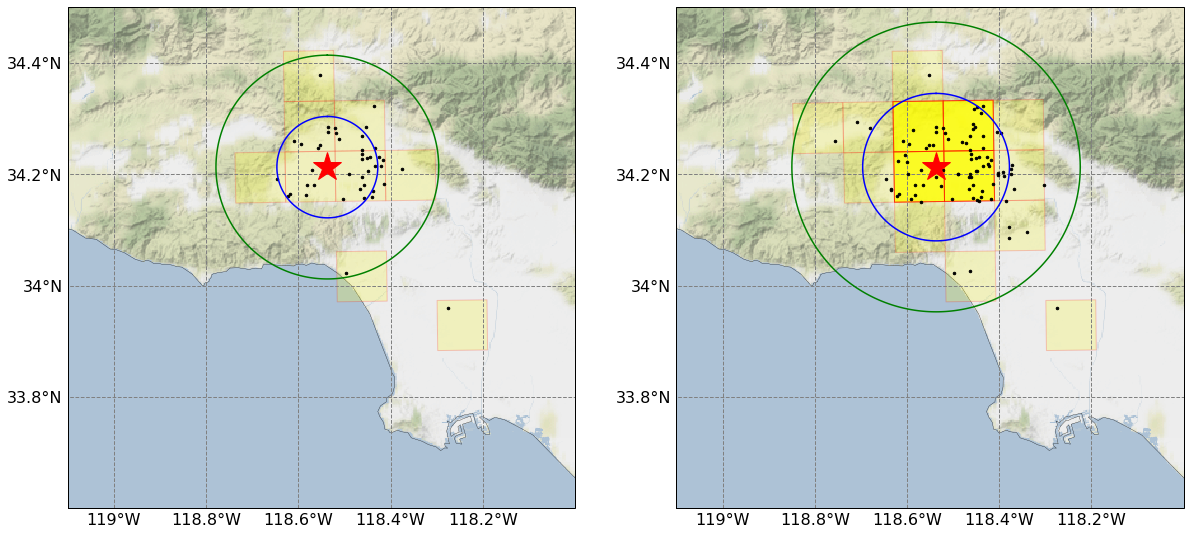

In [36]:
coords='-119.1/-118/33.6/34.5'
coords = coords.split('/')
minlon_extent = float(coords[0])
maxlon_extent = float(coords[1])
minlat_extent = float(coords[2])
maxlat_extent = float(coords[3])

eqlat = 34.213
eqlon = -118.537

stamen_terrain = cimgt.Stamen('terrain-background')
vp = 6.10
vs = 3.55
dep = 10

#----------------------------------------------------
#fig 1
time = 4


triggers = pd.read_csv(trigger_files[8])
triggers = triggers[triggers['longitude']<-118.2]
initial_polygons = initial_polygons.iloc[:-1]

fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(1, 2, 1, projection=stamen_terrain.crs)
ax.set_extent([minlon_extent, maxlon_extent, \
            minlat_extent, maxlat_extent])
#ax.set_aspect(0.1,adjustable='datalim',share=True)

ax.coastlines(resolution='10m',linewidth=0.3)

# Add the Stamen data at zoom level 8.
ax.add_image(stamen_terrain, 9, alpha=0.8)

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
            linewidth=1, color='gray', alpha=1, linestyle='--')


gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 16, 'color': 'black'}
gl.ylabel_style = {'size': 16, 'color': 'black'}
gl.xlabels_top = False
gl.ylabels_left = True
gl.ylabels_right= False 

gl.ylocator = mticker.MaxNLocator(nbins=8, steps=[1, 2, 5, 10])
gl.xlocator = mticker.MaxNLocator(nbins=6, steps=[1, 2, 5, 10])

# #plot the population using phones
ax.plot(triggers['longitude'],triggers['latitude'],'k.',\
         transform=ccrs.PlateCarree(),markersize=5)

ax.plot(eqlon,eqlat,'r*',transform=ccrs.PlateCarree(),markersize=30)

ax.add_geometries(initial_polygons.geometry, crs=ccrs.PlateCarree(), facecolor='yellow', \
                  edgecolor='red', linestyle='-', alpha=0.2)

dp = np.sqrt((vp*time)**2 - dep**2)
ds = np.sqrt((vs*time)**2 - dep**2)
Xp,Yp = equi(eqlon,eqlat,dp)
Xs,Ys = equi(eqlon,eqlat,ds)

ax.plot(Xp,Yp,'g',transform=ccrs.PlateCarree())
ax.plot(Xs,Ys,'b',transform=ccrs.PlateCarree())



#----------------------------------------------------
#fig 2
time = 5
triggers = pd.read_csv(trigger_files[10])
triggers = triggers[triggers['longitude']<-118.2]
all_polygons_at_detection = all_polygons_at_detection.iloc[:-1]

ax = fig.add_subplot(1, 2, 2, projection=stamen_terrain.crs)
ax.set_extent([minlon_extent, maxlon_extent, \
            minlat_extent, maxlat_extent])
#ax.set_aspect(0.1,adjustable='datalim',share=True)

ax.coastlines(resolution='10m',linewidth=0.3)

# Add the Stamen data at zoom level 8.
ax.add_image(stamen_terrain, 9, alpha=0.8)

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
            linewidth=1, color='gray', alpha=1, linestyle='--')


gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 16, 'color': 'black'}
gl.ylabel_style = {'size': 16, 'color': 'black'}
gl.xlabels_top = False
gl.ylabels_left = True
gl.ylabels_right= False 

gl.ylocator = mticker.MaxNLocator(nbins=4, steps=[1, 2, 5, 10])
gl.xlocator = mticker.MaxNLocator(nbins=6, steps=[1, 2, 5, 10])

# #plot the population using phones
ax.plot(triggers['longitude'],triggers['latitude'],'k.',\
         transform=ccrs.PlateCarree(),markersize=5)

ax.plot(eqlon,eqlat,'r*',transform=ccrs.PlateCarree(),markersize=30)

ax.add_geometries(polygons_at_detection.geometry, crs=ccrs.PlateCarree(), facecolor='yellow', \
                  edgecolor='red', linestyle='-', alpha=0.8)

ax.add_geometries(all_polygons_at_detection.geometry, crs=ccrs.PlateCarree(), facecolor='yellow', \
                  edgecolor='red', linestyle='-', alpha=0.2)

dp = np.sqrt((vp*time)**2 - dep**2)
ds = np.sqrt((vs*time)**2 - dep**2)
Xp,Yp = equi(eqlon,eqlat,dp)
Xs,Ys = equi(eqlon,eqlat,ds)


ax.plot(Xp,Yp,'g',transform=ccrs.PlateCarree())
ax.plot(Xs,Ys,'b',transform=ccrs.PlateCarree())

plt.savefig('Earthquake_detection_mgrs_cells.pdf',dpi=200)
